# Multi-Layer Perceptron

# Problems Identification: 

This project involves the implementation of efficient and effective MLP on MNIST data set. The MNIST data comprises of digital images of several digits ranging from 0 to 9. Each image is 28 x 28 pixels. Thus, the data set has 10 levels of classes.

These are the needed packages:

In [125]:
import winsound
import matplotlib.pyplot as plt
plt.rcdefaults()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC, LinearSVC
from mnist import MNIST
from time import time
import matplotlib.pyplot as plt
plt.rcdefaults()
from IPython.display import display
from pylab import subplot
import pandas as pd
import numpy as np
import os
import random as rand
import pylab as pl
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

Load the dataset, having downloaded it from Yann. The train data set comprises of 60,000 samples and the test data set has 10,000 samples.

In [2]:
__mndata__ = MNIST(os.getcwd() +'\\image')
__train_image__, __train_label__ = __mndata__.load_training() #train & train_label
__test_image__, __test_label__ = __mndata__.load_testing() #test & test_label

The train and test images were reshaped to 784 dimension long, which translate to one feature for each pixel in the image.

### Visualization:
Visualizing a random 28 by 28 image.

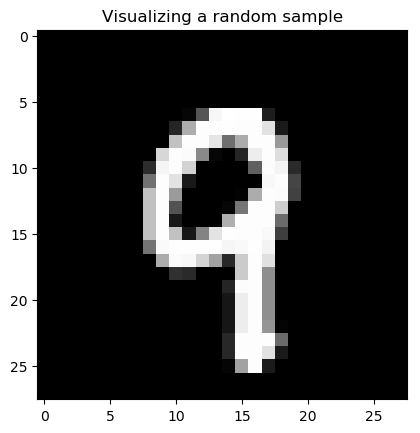

In [8]:
plt.imshow(np.reshape(__train_image__[rand.randint(1,1000)], [28,28]), cmap='Greys_r'); plt.title('Visualizing a random sample'); plt.show()

### Implementation functions:

In [1]:
class Utility:
    """This class warehouses the data and other general functions"""
    def __init__(self):
        self.train = np.asarray([np.reshape(x, (784)) for x in __train_image__]).astype(
            'float64')  # change train_image to numpy array #784 means 28 by 28 pixel
        self.train_label = np.asarray(__train_label__)
        self.test = np.asarray([np.reshape(x, (784)) for x in __test_image__]).astype(
            'float64')  # change test_image to numpy array
        self.test_label = np.asarray(__test_label__)
        self.n_class = list(range(10))  # class labels

    def mutiplePlot(xValue, yValues, legend, title, xLabel, yLabel, color):
        plt.subplots(figsize=(10, 5))
        for i in range(len(yValues)):
            plt.semilogx(xValue, yValues[i], '-gD', label=legend[i], color=color[i])
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.grid(True)
        plt.legend()
        plt.title(title)
        plt.show()

    def plot(xValues, yValue, xlabel, ylabel, title, semilogx=False, semilogy=False, xtick=False):
        yValue = np.round(yValue, 4)
        plt.figure(figsize=(12,5))
        if semilogx:
            plt.semilogx(xValues, yValue, '-gD', color='black')
        elif semilogy:
            plt.semilogy(xValues, yValue, '-gD', color='black')
        else:
            plt.plot(xValues, yValue, '-gD', color='black')
            
        ax = subplot(111)
        plt.xticks(xValues)
        if xtick:
            ax.set_xticks(xValues, xValues)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.title(title)
        plt.show()

    def sound_notifier():
        winsound.Beep(1000, 10000)

# End of Class Utility

class Model:
    '''This class warehouses functions for various models'''
    def __init__(self, train, train_lb, test, test_lb, k_fold_cv=None, live=True):
        '''
        :param train: X train
        :param train_lb: y train
        :param test: X test
        :param test_lb: y test
        :param k_fold_cv: number of folds for cross validation
        '''
        self.train = train
        self.train_lb = train_lb
        self.test = test
        self.test_lb = test_lb
        self.kfold = k_fold_cv
        self.live = live
        
    def mlp(self, alpha, solver):
        param_grid = ParameterGrid(dict(alpha=alpha, solver=solver))
        self.df = pd.DataFrame.from_dict(list(param_grid))
        self.df['train_acc'], self.df['test_acc'] = None, None
        t = time()
        self.model_param, self.test_pred, self.time = [], [], []

        for i, grid in enumerate(param_grid):
            st_tim = time()
            model = MLPClassifier(learning_rate_init=0.1, random_state=1)
            set_param = model.set_params(**grid)
            model_fit = model.fit(self.train, self.train_lb)
            self.time.append(time() - st_tim)
            self.model_param.append(model_fit)
            self.df['train_acc'][i] = model_fit.score(self.train, self.train_lb)
            pred = model_fit.predict(self.test)
            self.test_pred.append(pred)
            self.df['test_acc'][i] = accuracy_score(self.test_lb, pred)

        self.time_all = time() - t
        if not self.live:
            Utility.sound_notifier()
            
    def mlp_2(self, nodes, alpha, solver):
        param_grid = ParameterGrid(dict(hidden_layer_sizes=nodes))
        self.df = pd.DataFrame.from_dict(list(param_grid))
        self.df['train_acc'], self.df['test_acc'] = None, None
        t = time()
        self.model_param, self.test_pred, self.time = [], [], []

        for i, grid in enumerate(param_grid):
            st_tim = time()
            model = MLPClassifier(learning_rate_init=0.1, random_state=1, alpha=alpha, solver=solver)
            set_param = model.set_params(**grid)
            model_fit = model.fit(self.train, self.train_lb)
            self.time.append(time() - st_tim)
            self.model_param.append(model_fit)
            self.df['train_acc'][i] = model_fit.score(self.train, self.train_lb)
            pred = model_fit.predict(self.test)
            self.test_pred.append(pred)
            self.df['test_acc'][i] = accuracy_score(self.test_lb, pred)

        self.time_all = time() - t
        if not self.live:
            Utility.sound_notifier()

# Multi-Layer  (MLP)

MLP is a supervised machine learning algorithm for regression or classification. Within the input and output, there might be some nonlinear layers, called hidden layers. Hence, MLP has the ability to learn nonlinear models. Each of the hidden layers comprises of neurons, which is the number of nodes in the hidden layer. MLP is sensitive to unscaled features, thus it might be important to scale the feature - [0, 1], hence the training and testing sets will be divided by 255.

<u>Regularization in MLP</u>:<br>
MLPClassifier in sklearn uses parameter alpha for regularization (L2 regularization) [1]. Alpha is used for penalizing the weights, hence, ensuring that the weights are as small as possible. GridsearchCV can be used to obtain the best value of alpha, values ranging from 1e-6 to 1e-1 (log scale) are mostly used [1].

<u>Solver in MLP</u>:<br>
In Sklearn, the solver for weight optimization could be any of 'lbfgs', 'sgd', or 'adam' [2]. SGD refers to stochastic gradient descent, it performs better than the other two [1].

### Part A: Gridsearch over several values Alpha & Solver with default hidden layer

For simplicity, one hidden layer with 100 nodes will be used. In part B, the number of nodes in the hidden layer will be varied with the best parameters in this section. learning_rate_init will be set at 0.1 for 'sgd' and 'adam' solvers for quicker convergence.

In [4]:
util = Utility()
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
solver = ['lbfgs', 'adam', 'sgd']

In [5]:
model = Model(util.train/255, util.train_label, util.test/255, util.test_label, live=False)
model.mlp(alpha, solver)

In [6]:
model.df

,alpha,solver,train_acc,test_acc
0,0.000001,lbfgs,1,0.9766
1,0.000001,adam,0.901017,0.9009
2,0.000001,sgd,1,0.9792
3,0.000010,lbfgs,1,0.9765
4,0.000010,adam,0.8722,0.8724
5,0.000010,sgd,1,0.979
6,0.000100,lbfgs,1,0.9763
7,0.000100,adam,0.90065,0.8956
8,0.000100,sgd,1,0.9797
9,0.001000,lbfgs,1,0.9764


The set of parameters at index 0 and index 1 show overfitting and underfitting respectively. The best set of parameters is produced at the index 14 with alpha=0.01 and solver='sgd'. This produces training and testing accuracies of 0.999 and 0.981 respectively. These parameters tend to strike a balance between overfitting and underfitting, thus producing a reliable performance. Hence, these parameters will be used with different values of nodes in the hidden layer in part B.

### Part B: Using alpha=0.01 and solver='sgd' with different number of nodes in the hidden layer

In [82]:
nodes = [1, 10, 100, 200, 300, 400, 500, 600, 700, 785, 1000, 2000]

In [83]:
model_2 = Model(util.train/255, util.train_label, util.test/255, util.test_label, live=False)
model_2.mlp_2(nodes, 0.01, 'sgd')

In [84]:
test_acc_2 = model_2.df['test_acc']
df = pd.DataFrame(index=range(len(nodes)), columns=['nodes', 'test_acc'])
df['nodes'], df['test_acc'] = nodes, test_acc_2
df

,nodes,test_acc
0,1,0.1135
1,10,0.923
2,100,0.981
3,200,0.982
4,300,0.983
5,400,0.9837
6,500,0.9836
7,600,0.9848
8,700,0.9837
9,785,0.9847


The optimal testing accuracy is at nodes=600 with an accuracy of 0.9848, the testing accuracy seems to be relatively similar for nodes between 100 & 2000.

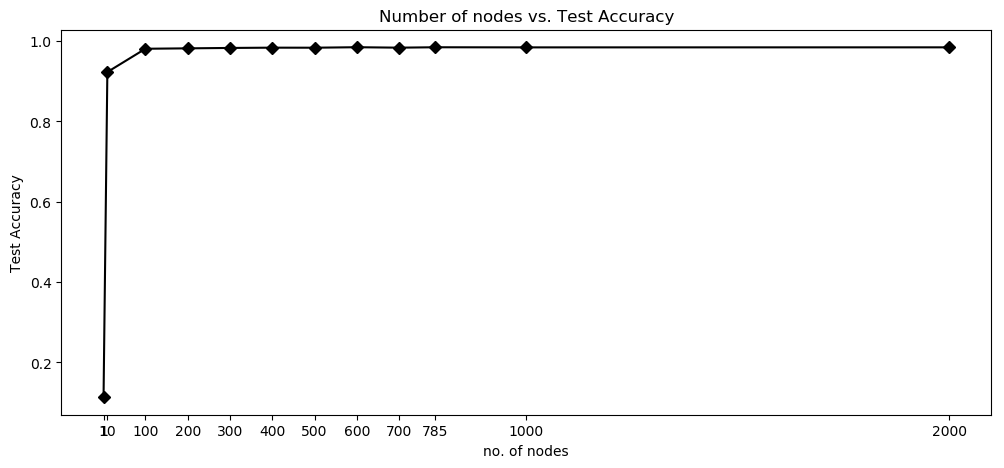

In [120]:
Utility.plot(nodes, list(test_acc_2), 'no. of nodes', 'Test Accuracy', 'Number of nodes vs. Test Accuracy', xtick=True)

### Part C: Performance of MLP against KNN, Naive Bayes, Logistic Regression & SVM

In [122]:
models_test_acc = {'Classifier': ['KNN with 85% variance explained','Naive Bayes', 'Logistic Regression', 'SVM Radial', 
                             'Multilayer Perceptron'], 'Test Accuracy': [0.9752, 0.8149, 0.9107, 0.9826, 0.9848]}
df_1 = pd.DataFrame(models_test_acc, columns=['Classifier', 'Test Accuracy'])
df_1

,Classifier,Test Accuracy
0,KNN with 85% variance explained,0.9752
1,Naive Bayes,0.8149
2,Logistic Regression,0.9107
3,SVM Radial,0.9826
4,Multilayer Perceptron,0.9848


The table above shows that the MLP performs better than the other models. SVM radial posses a close challenge, however, its training time is far higher than that of MLP.

The training time of the MLP classifier with the best set of parameters is 383 seconds. MLP is the fastest classifier of all the five classifiers, and it also gave the best accuracy on the testing set.

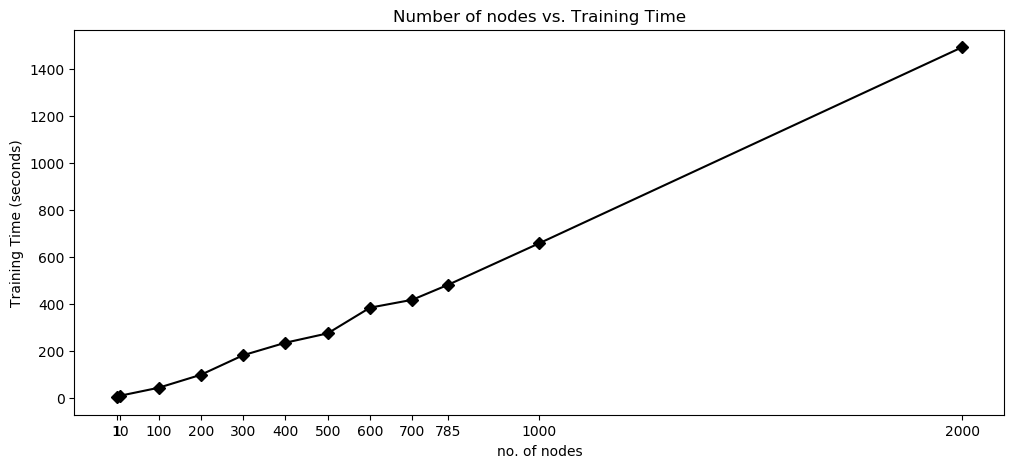

In [119]:
Utility.plot(nodes, model_2.time, 'no. of nodes', 'Training Time (seconds)', 'Number of nodes vs. Training Time', xtick=True)

This shows that the training time increases as the number of nodes in the hidden layer increase.

#### References:

[1] http://scikit-learn.org/stable/modules/neural_networks_supervised.html

[2] http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
